<a href="https://colab.research.google.com/github/ZainKautsar-doc/Bootcamp-DC/blob/main/Heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bussnis Undestanding

# 1.&nbsp; Pertemuan 1

### Latar Belakang Prediksi Penyakit Jantung

Penyakit jantung adalah salah satu penyebab kematian tertinggi di dunia. Setiap tahunnya, jutaan orang meninggal karena penyakit ini. Oleh karena itu, **deteksi dini sangat penting** agar pasien bisa mendapatkan penanganan lebih cepat dan mencegah kondisi menjadi parah.

Sayangnya, proses diagnosis biasanya memerlukan pemeriksaan yang mahal dan memakan waktu. Untuk itu, **teknologi machine learning** bisa digunakan untuk **memprediksi risiko penyakit jantung** berdasarkan data pasien, seperti:

- Usia
- Jenis kelamin
- Tekanan darah
- Kolesterol
- Hasil tes jantung
- dll

Model prediksi ini membantu dokter dan pasien untuk:
- Mengetahui risiko sejak dini
- Mengambil keputusan lebih cepat
- Mendorong pola hidup sehat lebih awal

Dengan membangun model ini, kita ikut mendukung perkembangan teknologi kesehatan dan bisa memberi dampak nyata dalam kehidupan masyarakat.


### 🧬 Deskripsi Fitur Dataset Penyakit Jantung

| **Nama Fitur**     | **Deskripsi** |
|--------------------|---------------|
| `Age`              | Usia pasien (dalam tahun) |
| `Sex`              | Jenis kelamin pasien:<br>• `M`: Laki-laki<br>• `F`: Perempuan |
| `ChestPainType`    | Jenis nyeri dada:<br>• `TA`: Angina tipikal<br>• `ATA`: Angina atipikal<br>• `NAP`: Nyeri non-angina<br>• `ASY`: Asimptomatik (tanpa gejala) |
| `RestingBP`        | Tekanan darah saat istirahat (mm Hg) |
| `Cholesterol`      | Kadar kolesterol serum (mg/dl) |
| `FastingBS`        | Gula darah puasa:<br>• `1`: Jika > 120 mg/dl<br>• `0`: Jika ≤ 120 mg/dl |
| `RestingECG`       | Hasil elektrokardiogram saat istirahat:<br>• `Normal`<br>• `ST`: Kelainan gelombang ST-T<br>• `LVH`: Hipertrofi ventrikel kiri |
| `MaxHR`            | Denyut jantung maksimum saat uji beban (rentang umum: 60–202) |
| `ExerciseAngina`   | Angina akibat olahraga:<br>• `Y`: Ya<br>• `N`: Tidak |
| `Oldpeak`          | Nilai depresi segmen ST setelah latihan fisik |
| `ST_Slope`         | Kemiringan segmen ST saat puncak latihan:<br>• `Up`: Menaik<br>• `Flat`: Datar<br>• `Down`: Menurun |
| `HeartDisease`     | Target/output:<br>• `1`: Mengidap penyakit jantung<br>• `0`: Normal |


# Data Understanding

### Import Library

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive
import pickle


### Hubungkan ke Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

### Baca Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IT Bootcamp/Data Science/dataset/heart.csv')

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

### Info Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Pertemuan 3


## Preprocessing Data

### Label Encoder

In [ ]:
# 1. Simpan salinan sebelum encoding
df_before = df.copy()

In [ ]:
# 2. Encoding
encoders = {}
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# 3. Tampilkan 5 baris pertama sebelum dan sesudah
print("Sebelum di-encode:")
print(df_before[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].head())

print("\nSetelah di-encode:")
print(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].head())

Sebelum di-encode:
  Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

Setelah di-encode:
   Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
0    1              1           1               0         2
1    0              2           1               0         1
2    1              1           2               0         2
3    0              0           1               1         1
4    1              2           1               0         2


### Normalisasi

In [ ]:
# 4. Tentukan kolom numerik untuk penskalaan
numerik = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
print(df[numerik].describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364
std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570
min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000
50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000


In [ ]:
# 5. Membakukan fitur numerik
scaler = StandardScaler()
df[numerik] = scaler.fit_transform(df[numerik])
print(df[numerik].describe())

                Age     RestingBP  Cholesterol     FastingBS         MaxHR  \
count  9.180000e+02  9.180000e+02   918.000000  9.180000e+02  9.180000e+02   
mean  -1.083616e-16  1.954380e-16     0.000000 -3.096047e-17  4.953675e-16   
std    1.000545e+00  1.000545e+00     1.000545  1.000545e+00  1.000545e+00   
min   -2.706015e+00 -7.154995e+00    -1.818435 -5.513413e-01 -3.018469e+00   
25%   -6.906294e-01 -6.699346e-01    -0.233704 -5.513413e-01 -6.605778e-01   
50%    5.188098e-02 -1.295128e-01     0.221363 -5.513413e-01  4.678968e-02   
75%    6.883185e-01  4.109089e-01     0.623835 -5.513413e-01  7.541571e-01   
max    2.491558e+00  3.653439e+00     3.697252  1.813758e+00  2.561874e+00   

            Oldpeak  
count  9.180000e+02  
mean   1.238419e-16  
std    1.000545e+00  
min   -3.271482e+00  
25%   -8.324324e-01  
50%   -2.695748e-01  
75%    5.747115e-01  
max    4.983762e+00  


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0


### Feature Engineering

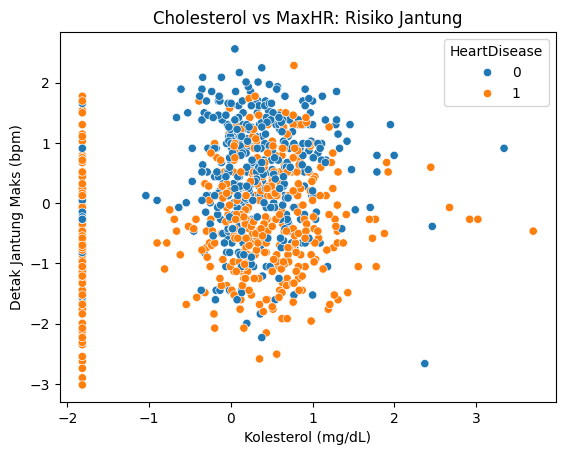

In [ ]:
df['Cholesterol_to_MaxHR'] = df['Cholesterol'] / df['MaxHR']
sns.scatterplot(x='Cholesterol', y='MaxHR', hue='HeartDisease', data=df)
plt.title('Cholesterol vs MaxHR: Risiko Jantung')
plt.xlabel('Kolesterol (mg/dL)')
plt.ylabel('Detak Jantung Maks (bpm)')
plt.savefig('cholesterol_maxhr_scatter.png')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_to_MaxHR
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0,0.596611
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1,-0.228018
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0,-0.504995
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1,-0.122810
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0,0.059718


### Hapus Kolom Cholesterol_to_MaxHR

In [ ]:
df = df.drop(columns=['Cholesterol_to_MaxHR'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0


### Pemisahan data Fitur dan Target

In [ ]:
# 5. Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Pertemuan 4

## Modeling

### Spling data


In [ ]:
# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the processed DataFrame
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2


### Random Forest

In [ ]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Logistic Regression

In [ ]:
# Train LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Evaluasi Model

In [ ]:
# Prediksi data uji dengan RandomForest
rf_y_pred = rf_model.predict(X_test)

# Prediksi data uji dengan LogisticRegression
lr_y_pred = lr_model.predict(X_test)

### Confusion matrix RF

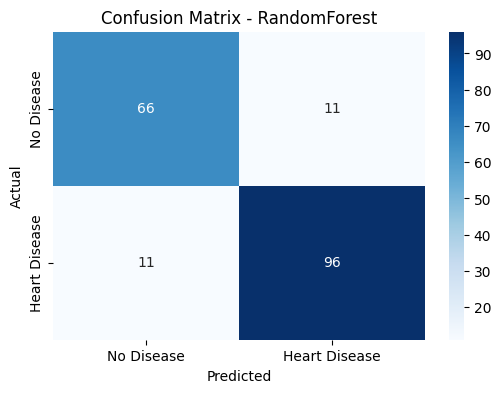

In [ ]:
# Confusion matrix untuk RandomForest
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Visualisasi confusion matrix untuk RandomForest
plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest")
plt.show()

### Confusion LR

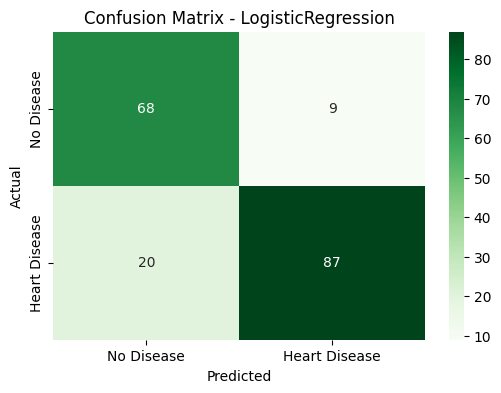

In [ ]:
# Confusion matrix untuk LogisticRegression
lr_cm = confusion_matrix(y_test, lr_y_pred)

# Visualisasi confusion matrix untuk LogisticRegression
plt.figure(figsize=(6,4))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LogisticRegression")
plt.show()

### Evaluasi Matrix RF

In [ ]:
# Evaluasi metrik untuk RandomForest
print("Classification Report - RandomForest:")
print(classification_report(y_test, rf_y_pred, target_names=["No Disease", "Heart Disease"]))

# Akurasi untuk RandomForest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy RandomForest: {rf_accuracy:.4f}")

Classification Report - RandomForest:
               precision    recall  f1-score   support

   No Disease       0.86      0.86      0.86        77
Heart Disease       0.90      0.90      0.90       107

     accuracy                           0.88       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184

Accuracy RandomForest: 0.8804


### Evaluasi Matrix LR

In [ ]:
# Evaluasi metrik untuk LogisticRegression
print("\nClassification Report - LogisticRegression:")
print(classification_report(y_test, lr_y_pred, target_names=["No Disease", "Heart Disease"]))

# Akurasi untuk LogisticRegression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy LogisticRegression: {lr_accuracy:.4f}")


Classification Report - LogisticRegression:
               precision    recall  f1-score   support

   No Disease       0.77      0.88      0.82        77
Heart Disease       0.91      0.81      0.86       107

     accuracy                           0.84       184
    macro avg       0.84      0.85      0.84       184
 weighted avg       0.85      0.84      0.84       184

Accuracy LogisticRegression: 0.8424


### Pengujian Model

In [ ]:
# 7. Input data uji manual (simulasi pasien)
pasien = {
    'Age': 40,
    'Sex': 'M',
    'ChestPainType': 'ATA',
    'RestingBP': 140,
    'Cholesterol': 289,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 172,
    'ExerciseAngina': 'N',
    'Oldpeak': 0.0,
    'ST_Slope': 'Up'
}

# 8. Buat DataFrame satu baris
df_pasien = pd.DataFrame([pasien])

# 9. Encode seperti sebelumnya
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df_pasien[col] = encoders[col].transform(df_pasien[col])

# 10. Standarisasi numerik
df_pasien[numerik] = scaler.transform(df_pasien[numerik])

# 11. Prediksi dengan probabilitas untuk RandomForest
rf_proba = rf_model.predict_proba(df_pasien)[0]
rf_prediksi = rf_model.predict(df_pasien)[0]

# 12. Tampilkan hasil untuk RandomForest
print("Hasil Prediksi RandomForest:")
print(f"{'Berisiko' if rf_prediksi == 1 else 'Tidak Berisiko'} Penyakit Jantung")
print(f"Probabilitas Tidak Berisiko (0): {rf_proba[0]:.2f}")
print(f"Probabilitas Berisiko (1): {rf_proba[1]:.2f}")

# 13. Prediksi dengan probabilitas untuk LogisticRegression
lr_proba = lr_model.predict_proba(df_pasien)[0]
lr_prediksi = lr_model.predict(df_pasien)[0]

# 14. Tampilkan hasil untuk LogisticRegression
print("\nHasil Prediksi LogisticRegression:")
print(f"{'Berisiko' if lr_prediksi == 1 else 'Tidak Berisiko'} Penyakit Jantung")
print(f"Probabilitas Tidak Berisiko (0): {lr_proba[0]:.2f}")
print(f"Probabilitas Berisiko (1): {lr_proba[1]:.2f}")

Hasil Prediksi RandomForest:
Tidak Berisiko Penyakit Jantung
Probabilitas Tidak Berisiko (0): 1.00
Probabilitas Berisiko (1): 0.00

Hasil Prediksi LogisticRegression:
Tidak Berisiko Penyakit Jantung
Probabilitas Tidak Berisiko (0): 0.93
Probabilitas Berisiko (1): 0.07


In [ ]:
# Menyimpan model dan preprocessor
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))
pickle.dump(lr_model, open('lr_model.pkl', 'wb'))
pickle.dump(encoders, open('encoders.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))